<a href="https://colab.research.google.com/github/nomo82/python/blob/main/Examen_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
#Importar librerias
import pandas as pd
import numpy as np
#Conectar al Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
#Usemos el metodo pivot y traemos el nuevo archivo glp
#Traemos el mismo archivo
df_calificaciones=pd.read_csv('/content/drive/MyDrive/Alexander Niño.lnk/2025/_Python/calificaciones.csv', encoding='ISO8859', sep=';')
#Traemos las columnas del DF
df_calificaciones.columns

Index(['ID No', 'Prog Code', 'Gender', 'YoG', 'MATEMÁTICAS', 'ESPAÑOL',
       'INGLÉS', 'QUÍMICA', 'FÍSICA', 'FILOSOFÍA'],
      dtype='object')

In [148]:
#Configuramos el Indice del DF con el campo 'ID No'
df_calificaciones.set_index('ID No', inplace=True)

In [149]:
#LLamamos al DF para validar la extructura de los datos
df_calificaciones.head()

,Prog Code,Gender,YoG,MATEMÁTICAS,ESPAÑOL,INGLÉS,QUÍMICA,FÍSICA,FILOSOFÍA
ID No,,,,,,,,,
42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13
70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02
31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19
63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19
30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24


In [150]:
#Determinar el tipo de datos de cada columna
df_calificaciones.dtypes

,0
Prog Code,object
Gender,object
YoG,int64
MATEMÁTICAS,float64
ESPAÑOL,float64
INGLÉS,float64
QUÍMICA,float64
FÍSICA,float64
FILOSOFÍA,float64


In [151]:
#Estadisticas descriptivas del DF
df_calificaciones.describe()

,YoG,MATEMÁTICAS,ESPAÑOL,INGLÉS,QUÍMICA,FÍSICA,FILOSOFÍA
count,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000
mean,2012.183848,3.494813,3.636106,3.321687,3.418578,3.532508,3.119645
std,1.329104,0.691614,0.679256,0.782473,0.858518,0.802228,0.616151
min,2010.000000,1.520000,1.570000,1.170000,0.630000,0.000000,1.460000
25%,2011.000000,3.000000,3.180000,2.760000,2.810000,3.000000,2.660000
50%,2012.000000,3.560000,3.690000,3.340000,3.510000,3.620000,3.060000
75%,2013.000000,4.010000,4.150000,3.920000,4.100000,4.150000,3.570000
max,2014.000000,4.990000,5.000000,5.000000,5.000000,5.000000,4.930000


In [152]:
#Mostrar si el DF tiene valores 'null'
df_calificaciones.isnull().sum()

,0
Prog Code,0
Gender,0
YoG,0
MATEMÁTICAS,0
ESPAÑOL,0
INGLÉS,0
QUÍMICA,0
FÍSICA,0
FILOSOFÍA,0


In [153]:
#Mostrar del DF si existen valores duplicados
df_calificaciones.duplicated().value_counts()

,count
False,3046


In [154]:
#Creación de variables ... Una lista con todas las calificaciones varfiable 'materias'
materias = df_calificaciones.iloc[:,3:8]
materias

,MATEMÁTICAS,ESPAÑOL,INGLÉS,QUÍMICA,FÍSICA
ID No,,,,,
42308,3.23,2.88,3.48,2.62,2.90
70978,3.58,3.25,4.26,3.37,3.47
31602,2.21,1.78,1.98,1.49,2.51
63847,2.70,2.67,2.44,2.00,2.35
30158,3.88,3.61,3.69,3.63,4.58
...,...,...,...,...,...
64106,4.18,4.04,4.23,4.16,4.28
96596,2.91,2.36,3.35,2.87,3.02
64982,3.66,3.42,3.83,3.55,3.82


In [155]:
#Crear un diccionario con el conteo de estudiantes por programa
#df_calificaciones[df_calificaciones['Prog Code']].value_counts('Prog Code')
conteo_programas = df_calificaciones.value_counts('Prog Code')
conteo_programas

,count
Prog Code,
EEE,418
CIS,342
MIS,307
ICE,245
CEN,237
CHE,213
PET,207
MCE,184
CVE,167


In [156]:
diccionario_programas = {'Programa':conteo_programas}
diccionario_programas

{'Programa': Prog Code
 EEE     418
 CIS     342
 MIS     307
 ICE     245
 CEN     237
 CHE     213
 PET     207
 MCE     184
 CVE     167
 MCB     164
 BCH     148
 CHM     111
 BLD      97
 PHYE     82
 MAT      61
 PHYG     37
 PHYR     26
 Name: count, dtype: int64}

**Parte 2: Selección y Filtrado de Datos**

 Utilizando loc():
   - Seleccione todos los estudiantes del programa 'ING' y muestre sus calificaciones de MATEMÁTICAS y FÍSICA
   - Obtenga las calificaciones completas de los estudiantes con ID entre 1000 y 1050
   - Cree un DataFrame con estudiantes que tienen INGLÉS > 90 y ESPAÑOL > 85

In [157]:
#Seleccione todos los estudiantes del programa 'ING' y muestre sus calificaciones de MATEMÁTICAS y FÍSICA
columnas = ['Prog Code','MATEMÁTICAS', 'FÍSICA']
df_calificaciones.loc[df_calificaciones['Prog Code']=='EEE', columnas]

,Prog Code,MATEMÁTICAS,FÍSICA
ID No,,,
57038,EEE,2.33,2.52
85508,EEE,2.36,1.68
94681,EEE,2.07,1.84
33027,EEE,1.73,1.40
49561,EEE,3.10,2.70
...,...,...,...
89487,EEE,4.33,4.55
28546,EEE,4.34,4.48
34277,EEE,4.35,4.24


In [159]:
#Obtenga las calificaciones completas de los estudiantes con ID entre 1000 y 1050
df_calificaciones.loc[1000:1050]

KeyError: 1000

In [160]:
#Cree un DataFrame con estudiantes que tienen INGLÉS > 90 y ESPAÑOL > 85
columnas_2 = ['INGLÉS', 'ESPAÑOL']
df_calificaciones.loc[(df_calificaciones['INGLÉS'] > 4.5) & (df_calificaciones['ESPAÑOL'] > 4.25), columnas_2]

,INGLÉS,ESPAÑOL
ID No,,
54093,4.98,5.00
77591,4.70,4.34
45410,4.74,4.28
66373,4.72,4.30
69939,4.52,4.72
...,...,...
75716,4.71,4.93
95699,4.51,4.78
51702,4.53,4.38


In [161]:
#Seleccione las primeras 20 filas y las columnas de calificaciones
df_calificaciones.iloc[0:20,[3,4,5,6,7,8]]

,MATEMÁTICAS,ESPAÑOL,INGLÉS,QUÍMICA,FÍSICA,FILOSOFÍA
ID No,,,,,,
42308,3.23,2.88,3.48,2.62,2.90,3.13
70978,3.58,3.25,4.26,3.37,3.47,3.02
31602,2.21,1.78,1.98,1.49,2.51,2.19
63847,2.70,2.67,2.44,2.00,2.35,3.19
30158,3.88,3.61,3.69,3.63,4.58,4.24
51740,2.97,2.66,2.98,3.28,3.07,3.13
76075,3.34,3.68,3.00,3.44,3.28,3.02
60888,2.56,2.30,2.50,2.29,2.77,2.68
43378,3.76,3.30,3.64,3.88,4.37,3.13


In [162]:
#Obtenga la información del último estudiante del DataFrame
df_calificaciones.iloc[-1]

,65054
Prog Code,PHYG
Gender,Male
YoG,2014
MATEMÁTICAS,4.18
ESPAÑOL,4.29
INGLÉS,4.43
QUÍMICA,3.68
FÍSICA,4.14
FILOSOFÍA,4.1


In [163]:
#- Cree una muestra con los estudiantes en posiciones pares (0, 2, 4, ...)
df_calificaciones['Posición'] = range(len(df_calificaciones))


In [164]:
df_calificaciones.loc[df_calificaciones['Posición'].apply(lambda x:x%2) == 0 ]

,Prog Code,Gender,YoG,MATEMÁTICAS,ESPAÑOL,INGLÉS,QUÍMICA,FÍSICA,FILOSOFÍA,Posición
ID No,,,,,,,,,,
42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13,0
31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19,2
30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24,4
76075,BCH,Male,2010,3.34,3.68,3.00,3.44,3.28,3.02,6
43378,BCH,Male,2010,3.76,3.30,3.64,3.88,4.37,3.13,8
...,...,...,...,...,...,...,...,...,...,...
49795,PHYG,Male,2013,4.27,4.16,4.45,4.16,4.28,2.89,3036
91629,PHYG,Female,2013,4.38,4.31,4.40,4.39,4.44,3.13,3038
28728,PHYG,Male,2013,3.49,4.00,3.09,3.45,3.42,3.98,3040


In [ ]:
#Identifique estudiantes con calificaciones superiores a 80 en todas las materias
columnas_3 = ['MATEMÁTICAS', 'ESPAÑOL', 'INGLÉS', 'QUÍMICA', 'FÍSICA', 'FILOSOFÍA']
#df_calificaciones.iloc[:, 3:]
df_calificaciones.loc[
    (df_calificaciones['MATEMÁTICAS'] > 4.0) &
    (df_calificaciones['ESPAÑOL'] > 4.0) &
    (df_calificaciones['INGLÉS'] > 4.0) &
    (df_calificaciones['QUÍMICA'] > 4.0) &
    (df_calificaciones['FÍSICA'] > 4.0) &
    (df_calificaciones['FILOSOFÍA'] > 4.0),  columnas_3]

In [165]:
#Encuentre estudiantes que necesitan tutoría (promedio general < 70)
df_calificaciones['PROMEDIO_GENERAL'] = df_calificaciones[
    ['MATEMÁTICAS', 'ESPAÑOL', 'INGLÉS', 'QUÍMICA', 'FÍSICA', 'FILOSOFÍA']].apply(np.mean, axis=1)
df_calificaciones

,Prog Code,Gender,YoG,MATEMÁTICAS,ESPAÑOL,INGLÉS,QUÍMICA,FÍSICA,FILOSOFÍA,Posición,PROMEDIO_GENERAL
ID No,,,,,,,,,,,
42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13,0,3.040000
70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02,1,3.491667
31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19,2,2.026667
63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19,3,2.558333
30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24,4,3.938333
...,...,...,...,...,...,...,...,...,...,...,...
64106,PHYG,Female,2013,4.18,4.04,4.23,4.16,4.28,3.20,3041,4.015000
96596,PHYG,Male,2013,2.91,2.36,3.35,2.87,3.02,2.03,3042,2.756667
64982,PHYG,Male,2013,3.66,3.42,3.83,3.55,3.82,3.33,3043,3.601667


In [166]:
df_calificaciones.loc[df_calificaciones['PROMEDIO_GENERAL']<3.5, 'PROMEDIO_GENERAL']

,PROMEDIO_GENERAL
ID No,
42308,3.040000
70978,3.491667
31602,2.026667
63847,2.558333
51740,3.015000
...,...
45217,2.240000
96411,3.403333
77721,2.478333


In [167]:
#Cree un DataFrame con los 10 mejores promedios por género
df_genero= df_calificaciones.sort_values(['PROMEDIO_GENERAL'], ascending= False)
df_genero

,Prog Code,Gender,YoG,MATEMÁTICAS,ESPAÑOL,INGLÉS,QUÍMICA,FÍSICA,FILOSOFÍA,Posición,PROMEDIO_GENERAL
ID No,,,,,,,,,,,
37492,CIS,Female,2014,4.99,4.96,5.00,5.00,5.00,4.31,1236,4.876667
76723,CVE,Male,2013,4.93,4.96,4.92,4.93,4.97,4.44,832,4.858333
54093,BCH,Female,2010,4.99,5.00,4.98,5.00,5.00,4.14,12,4.851667
64572,EEE,Female,2013,4.81,4.93,4.69,4.79,4.76,4.88,2081,4.810000
95102,CHE,Female,2014,4.86,4.89,4.71,4.85,4.91,4.51,620,4.788333
...,...,...,...,...,...,...,...,...,...,...,...
81642,MCB,Female,2014,1.79,1.65,1.80,1.74,1.87,2.13,229,1.830000
64471,MIS,Male,2010,1.69,2.00,2.09,1.13,1.54,1.96,1244,1.735000
29117,BLD,Male,2011,1.92,2.03,1.40,1.41,1.81,1.84,409,1.735000


In [168]:
df_genero[df_genero['Gender']=='Female'].head(10)

,Prog Code,Gender,YoG,MATEMÁTICAS,ESPAÑOL,INGLÉS,QUÍMICA,FÍSICA,FILOSOFÍA,Posición,PROMEDIO_GENERAL
ID No,,,,,,,,,,,
37492,CIS,Female,2014,4.99,4.96,5.00,5.00,5.00,4.31,1236,4.876667
54093,BCH,Female,2010,4.99,5.00,4.98,5.00,5.00,4.14,12,4.851667
64572,EEE,Female,2013,4.81,4.93,4.69,4.79,4.76,4.88,2081,4.810000
95102,CHE,Female,2014,4.86,4.89,4.71,4.85,4.91,4.51,620,4.788333
75716,PET,Female,2013,4.80,4.93,4.71,4.72,4.82,4.51,2834,4.748333
54460,CEN,Female,2013,4.75,4.87,4.61,4.64,4.90,4.64,1702,4.735000
40810,CIS,Female,2014,4.79,4.53,4.93,5.00,4.79,4.24,1215,4.713333
31124,EEE,Female,2010,4.87,4.89,4.92,4.98,4.55,3.96,1818,4.695000
39695,CEN,Female,2010,4.78,4.93,4.88,4.74,4.72,4.10,1604,4.691667


In [169]:
df_genero[df_genero['Gender']=='Male'].head(10)


,Prog Code,Gender,YoG,MATEMÁTICAS,ESPAÑOL,INGLÉS,QUÍMICA,FÍSICA,FILOSOFÍA,Posición,PROMEDIO_GENERAL
ID No,,,,,,,,,,,
76723,CVE,Male,2013,4.93,4.96,4.92,4.93,4.97,4.44,832,4.858333
94587,EEE,Male,2011,4.85,4.91,4.78,4.89,4.79,4.44,1927,4.776667
88281,CIS,Male,2011,4.83,4.74,4.79,4.93,4.88,4.45,1021,4.770000
74806,EEE,Male,2010,4.83,4.84,4.90,4.83,4.62,4.51,1913,4.755000
38184,EEE,Male,2012,4.79,4.81,4.76,4.74,5.00,4.30,2033,4.733333
67113,PET,Male,2010,4.85,4.80,4.90,4.83,4.62,4.38,2712,4.730000
75243,CHE,Male,2010,4.81,4.84,4.84,4.69,4.72,4.45,433,4.725000
39387,MCE,Male,2011,4.88,4.69,4.87,4.98,4.87,3.98,2555,4.711667
65756,CIS,Male,2013,4.80,4.78,4.81,4.83,4.81,4.22,1161,4.708333


## Parte 3: Transformación y Análisis (35 puntos)

#7. Creación de nuevas columnas:
  - 'PROMEDIO_GENERAL': promedio de todas las materias
  - 'PROMEDIO_CIENCIAS': promedio de QUÍMICA, FÍSICA y MATEMÁTICAS
  - 'ESTADO': "EXCELENTE" (≥90), "BUENO" (≥80), "REGULAR" (≥70), "EN RIESGO" (<70)

In [170]:
#Creamos la columna 'PROMEDIO_CIENCIAS'
df_calificaciones['PROMEDIO_CIENCIAS'] = df_calificaciones[['MATEMÁTICAS', 'QUÍMICA', 'FÍSICA']].apply(np.mean, axis=1)
df_calificaciones


,Prog Code,Gender,YoG,MATEMÁTICAS,ESPAÑOL,INGLÉS,QUÍMICA,FÍSICA,FILOSOFÍA,Posición,PROMEDIO_GENERAL,PROMEDIO_CIENCIAS
ID No,,,,,,,,,,,,
42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13,0,3.040000,2.916667
70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02,1,3.491667,3.473333
31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19,2,2.026667,2.070000
63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19,3,2.558333,2.350000
30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24,4,3.938333,4.030000
...,...,...,...,...,...,...,...,...,...,...,...,...
64106,PHYG,Female,2013,4.18,4.04,4.23,4.16,4.28,3.20,3041,4.015000,4.206667
96596,PHYG,Male,2013,2.91,2.36,3.35,2.87,3.02,2.03,3042,2.756667,2.933333
64982,PHYG,Male,2013,3.66,3.42,3.83,3.55,3.82,3.33,3043,3.601667,3.676667


In [171]:
#Creamos la columna 'PROMEDIO_GENERAL'
df_calificaciones['PROMEDIO_GENERAL'] = df_calificaciones[
    ['MATEMÁTICAS', 'ESPAÑOL', 'INGLÉS', 'QUÍMICA', 'FÍSICA', 'FILOSOFÍA']].apply(np.mean, axis=1)
df_calificaciones

,Prog Code,Gender,YoG,MATEMÁTICAS,ESPAÑOL,INGLÉS,QUÍMICA,FÍSICA,FILOSOFÍA,Posición,PROMEDIO_GENERAL,PROMEDIO_CIENCIAS
ID No,,,,,,,,,,,,
42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13,0,3.040000,2.916667
70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02,1,3.491667,3.473333
31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19,2,2.026667,2.070000
63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19,3,2.558333,2.350000
30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24,4,3.938333,4.030000
...,...,...,...,...,...,...,...,...,...,...,...,...
64106,PHYG,Female,2013,4.18,4.04,4.23,4.16,4.28,3.20,3041,4.015000,4.206667
96596,PHYG,Male,2013,2.91,2.36,3.35,2.87,3.02,2.03,3042,2.756667,2.933333
64982,PHYG,Male,2013,3.66,3.42,3.83,3.55,3.82,3.33,3043,3.601667,3.676667


In [172]:
# Creamos la función para determinar el 'ESTADO' en el DataFrame df_calificaciones
def ESTADO(PROMEDIO_GENERAL):
    if PROMEDIO_GENERAL >= 4.5:
        return 'EXCELENTE'
    elif 3.5 < PROMEDIO_GENERAL < 4.5:
        return 'BUENO'
    elif 3.0 < PROMEDIO_GENERAL <= 3.5:
        return 'REGULAR'
    else:
        return 'EN RIESGO'

# Aplicamos la función 'ESTADO' al DataFrame df_calificaciones
df_calificaciones['ESTADO'] = df_calificaciones['PROMEDIO_GENERAL'].apply(ESTADO)

# Mostramos las primeras 20 filas del DataFrame
df_calificaciones.head(20)

,Prog Code,Gender,YoG,MATEMÁTICAS,ESPAÑOL,INGLÉS,QUÍMICA,FÍSICA,FILOSOFÍA,Posición,PROMEDIO_GENERAL,PROMEDIO_CIENCIAS,ESTADO
ID No,,,,,,,,,,,,,
42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13,0,3.040000,2.916667,REGULAR
70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02,1,3.491667,3.473333,REGULAR
31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19,2,2.026667,2.070000,EN RIESGO
63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19,3,2.558333,2.350000,EN RIESGO
30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24,4,3.938333,4.030000,BUENO
51740,BCH,Male,2010,2.97,2.66,2.98,3.28,3.07,3.13,5,3.015000,3.106667,REGULAR
76075,BCH,Male,2010,3.34,3.68,3.00,3.44,3.28,3.02,6,3.293333,3.353333,REGULAR
60888,BCH,Female,2010,2.56,2.30,2.50,2.29,2.77,2.68,7,2.516667,2.540000,EN RIESGO
43378,BCH,Male,2010,3.76,3.30,3.64,3.88,4.37,3.13,8,3.680000,4.003333,BUENO


#Uso de apply() y lambda:
  - Cree una función que calcule la diferencia entre la mejor y peor calificación
  - Utilice lambda para identificar la materia con menor calificación por estudiante
  - Aplique una bonificación de 5% a las calificaciones menores a 60

In [173]:
# Creamos la función para 'MEJOR O PEOR CALIFICACIÓN' del DF df_calificaciones
def diferencia_calificaciones(row):
    return row.max() - row.min()

In [174]:
# Aplicamos la función a cada fila del DataFrame
df_calificaciones['DIFERENCIA_CALIFICACIONES'] = df_calificaciones[
    ['MATEMÁTICAS', 'ESPAÑOL', 'INGLÉS', 'QUÍMICA', 'FÍSICA', 'FILOSOFÍA']].apply(diferencia_calificaciones, axis=1)

In [175]:
#Uso de lambda para identificar la materia con la menor calificación por estudiante
df_calificaciones['MATERIA_MENOR_CALIFICACION'] = df_calificaciones[
    ['MATEMÁTICAS', 'ESPAÑOL', 'INGLÉS', 'QUÍMICA', 'FÍSICA', 'FILOSOFÍA']].apply(lambda row: row.idxmin(), axis=1)

In [177]:
df_calificaciones

,Prog Code,Gender,YoG,MATEMÁTICAS,ESPAÑOL,INGLÉS,QUÍMICA,FÍSICA,FILOSOFÍA,Posición,...,PROMEDIO_CIENCIAS,ESTADO,DIFERENCIA_CALIFICACIONES,MATERIA_MENOR_CALIFICACION,MATEMÁTICAS_BONIFICADA,ESPAÑOL_BONIFICADA,INGLÉS_BONIFICADA,QUÍMICA_BONIFICADA,FÍSICA_BONIFICADA,FILOSOFÍA_BONIFICADA
ID No,,,,,,,,,,,,,,,,,,,,,
42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13,0,...,2.916667,REGULAR,0.86,QUÍMICA,3.2300,3.0240,3.480,2.7510,3.0450,3.1300
70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02,1,...,3.473333,REGULAR,1.24,FILOSOFÍA,3.5800,3.2500,4.260,3.3700,3.4700,3.0200
31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19,2,...,2.070000,EN RIESGO,1.02,QUÍMICA,2.3205,1.8690,2.079,1.5645,2.6355,2.2995
63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19,3,...,2.350000,EN RIESGO,1.19,QUÍMICA,2.8350,2.8035,2.562,2.1000,2.4675,3.1900
30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24,4,...,4.030000,BUENO,0.97,ESPAÑOL,3.8800,3.6100,3.690,3.6300,4.5800,4.2400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64106,PHYG,Female,2013,4.18,4.04,4.23,4.16,4.28,3.20,3041,...,4.206667,BUENO,1.08,FILOSOFÍA,4.1800,4.0400,4.230,4.1600,4.2800,3.2000
96596,PHYG,Male,2013,2.91,2.36,3.35,2.87,3.02,2.03,3042,...,2.933333,EN RIESGO,1.32,FILOSOFÍA,3.0555,2.4780,3.350,3.0135,3.0200,2.1315
64982,PHYG,Male,2013,3.66,3.42,3.83,3.55,3.82,3.33,3043,...,3.676667,BUENO,0.50,FILOSOFÍA,3.6600,3.4200,3.830,3.5500,3.8200,3.3300


In [176]:
# Función para aplicar una bonificación del 5% a las calificaciones menores a 3
def BONIFICACION(CALIFICACION):
    if CALIFICACION < 3:
        return CALIFICACION * 1.05  # Bonificación del 5%
    else:
        return CALIFICACION

# Lista de columnas de calificaciones (materias)
materias = ['MATEMÁTICAS', 'ESPAÑOL', 'INGLÉS', 'QUÍMICA', 'FÍSICA', 'FILOSOFÍA']

# Aplicar la bonificación a cada columna de calificaciones
for materia in materias:
    df_calificaciones[f'{materia}_BONIFICADA'] = df_calificaciones[materia].apply(BONIFICACION)

# Mostrar las primeras 20 filas del DataFrame con las calificaciones bonificadas
print(df_calificaciones.head(5))

      Prog Code  Gender   YoG  MATEMÁTICAS  ESPAÑOL  INGLÉS  QUÍMICA  FÍSICA  \
ID No                                                                          
42308       ICE  Female  2010         3.23     2.88    3.48     2.62    2.90   
70978       BCH  Female  2010         3.58     3.25    4.26     3.37    3.47   
31602       BCH    Male  2010         2.21     1.78    1.98     1.49    2.51   
63847       BCH    Male  2010         2.70     2.67    2.44     2.00    2.35   
30158       BCH  Female  2010         3.88     3.61    3.69     3.63    4.58   

       FILOSOFÍA  Posición  ...  PROMEDIO_CIENCIAS     ESTADO  \
ID No                       ...                                 
42308       3.13         0  ...           2.916667    REGULAR   
70978       3.02         1  ...           3.473333    REGULAR   
31602       2.19         2  ...           2.070000  EN RIESGO   
63847       3.19         3  ...           2.350000  EN RIESGO   
30158       4.24         4  ...           4.03000

## Parte 4: Agrupación y Estadísticas (30 puntos)

10.  Análisis por programa:
    - Calcule el promedio de cada materia por programa
    - Identifique el programa con mejor desempeño general
    - Genere un resumen estadístico por programa

In [178]:
#Promedios por programa y materia
promedios = df_calificaciones.groupby("Prog Code")[["MATEMÁTICAS", "ESPAÑOL", "INGLÉS", "QUÍMICA", "FÍSICA", "FILOSOFÍA"]].mean()
promedios

,MATEMÁTICAS,ESPAÑOL,INGLÉS,QUÍMICA,FÍSICA,FILOSOFÍA
Prog Code,,,,,,
BCH,3.541959,3.505068,3.459054,3.501486,3.690000,3.131892
BLD,3.333711,3.049381,3.066804,3.368969,3.363814,2.799588
CEN,3.520717,3.795865,3.303629,3.402025,3.615992,3.251941
CHE,3.666714,3.976808,3.490141,3.459390,3.728967,3.336385
CHM,3.558649,3.277748,3.408018,3.837207,3.830541,2.921171
CIS,3.468070,3.589035,3.383889,3.438129,3.429825,3.049766
CVE,3.461437,3.617844,3.053533,3.222994,3.689222,2.973234
EEE,3.639833,4.037823,3.495981,3.552943,3.448517,3.389569
ICE,3.499306,3.729918,3.247714,3.313388,3.492286,3.138204


In [179]:
#Analisis por programa
#Identifique el programa con mejor desempeño general
df_calificaciones['Desempeño_general'] = df_calificaciones[['MATEMÁTICAS', 'ESPAÑOL', 'INGLÉS', 'QUÍMICA', 'FÍSICA', 'FILOSOFÍA']].apply(np.mean, axis=1)
df_Desempeño_agrupado=df_calificaciones.groupby('Prog Code')['Desempeño_general'].mean()
df_Desempeño_agrupado=df_Desempeño_agrupado.sort_values(ascending=False)
df_Desempeño_agrupado.iloc[0:1]

,Desempeño_general
Prog Code,
CHE,3.609734


In [180]:
# Resumen estadistico
resumen_por_programa = df_calificaciones.groupby("Prog Code")[["MATEMÁTICAS", "ESPAÑOL", "INGLÉS", "QUÍMICA", "FÍSICA", "FILOSOFÍA"]].describe()
resumen_por_programa

MATEMÁTICAS                                                         \
                count      mean       std   min     25%    50%     75%   max   
Prog Code                                                                      
BCH             148.0  3.541959  0.668410  1.91  2.9875  3.595  4.0525  4.99   
BLD              97.0  3.333711  0.651809  1.81  2.9200  3.420  3.7800  4.67   
CEN             237.0  3.520717  0.702296  1.84  3.1400  3.640  4.0600  4.78   
CHE             213.0  3.666714  0.673476  1.94  3.2300  3.760  4.2000  4.86   
CHM             111.0  3.558649  0.625740  1.79  3.1400  3.610  4.0000  4.83   
CIS             342.0  3.468070  0.720358  1.87  2.9125  3.515  3.9850  4.99   
CVE             167.0  3.461437  0.692783  1.97  2.9100  3.500  3.9450  4.93   
EEE             418.0  3.639833  0.680519  1.73  3.2025  3.710  4.1675  4.87   
ICE             245.0  3.499306  0.690091  1.80  3.0900  3.540  3.9800  4.89   
MAT              61.0  3.383934  0.773846  1.91  2.9100  3.430  4.0300  4.80   
MCB             164.0  3.482805  0.700327  1.79  2.9300  3.625  4.0325  4.70   
MCE             184.0  3.533696  0.664914  1.99  3.0450  3.570  4.0225  4.88   
MIS             307.0  3.244430  0.703952  1.52  2.7550  3.260  3.7300  4.71   
PET             207.0  3.517536  0.610925  2.07  3.0700  3.530  3.9000  4.85   
PHYE             82.0  3.416951  0.652346  1.80  2.9950  3.515  3.8525  4.50   
PHYG             37.0  3.294865  0.708142  1.88  2.7200  3.460  3.7300  4.56   
PHYR             26.0  3.469231  0.609406  2.13  3.1000  3.425  3.8675  4.46   

          ESPAÑOL            ...  FÍSICA       FILOSOFÍA                      \
            count      mean  ...     75%   max     count      mean       std   
Prog Code                    ...                                               
BCH         148.0  3.505068  ...  4.3550  5.00     148.0  3.131892  0.554760   
BLD          97.0  3.049381  ...  4.0400  4.77      97.0  2.799588  0.548139   
CEN         237.0  3.795865  ...  4.1700  4.90     237.0  3.251941  0.550690   
CHE         213.0  3.976808  ...  4.4700  4.97     213.0  3.336385  0.613297   
CHM         111.0  3.277748  ...  4.3200  4.93     111.0  2.921171  0.533823   
CIS         342.0  3.589035  ...  4.0425  5.00     342.0  3.049766  0.595823   
CVE         167.0  3.617844  ...  4.2800  4.97     167.0  2.973234  0.573865   
EEE         418.0  4.037823  ...  4.0000  5.00     418.0  3.389569  0.621914   
ICE         245.0  3.729918  ...  4.0700  4.93     245.0  3.138204  0.581505   
MAT          61.0  3.366885  ...  4.0200  4.86      61.0  2.794590  0.634596   
MCB         164.0  3.352866  ...  4.4450  4.96     164.0  3.049451  0.552144   
MCE         184.0  3.914402  ...  4.1375  4.97     184.0  3.310326  0.600452   
MIS         307.0  3.076254  ...  3.9400  4.87     307.0  2.812476  0.568530   
PET         207.0  3.843768  ...  3.9800  5.00     207.0  3.230435  0.597078   
PHYE         82.0  3.445244  ...  4.1450  4.91      82.0  2.861341  0.514637   
PHYG         37.0  3.449730  ...  3.8900  4.63      37.0  3.042162  0.633325   
PHYR         26.0  3.520769  ...  3.9850  4.86      26.0  2.980769  0.793922   

                                              
            min     25%    50%     75%   max  
Prog Code                                     
BCH        1.76  2.7250  3.130  3.5200  4.45  
BLD        1.47  2.4300  2.770  3.0500  4.45  
CEN        1.67  2.8100  3.260  3.6200  4.77  
CHE        1.77  2.8900  3.280  3.8300  4.88  
CHM        1.74  2.5000  2.890  3.2200  4.30  
CIS        1.76  2.5900  3.040  3.5200  4.93  
CVE        1.72  2.5800  2.950  3.3200  4.44  
EEE        1.96  2.9200  3.360  3.8900  4.88  
ICE        1.74  2.6800  3.190  3.5400  4.38  
MAT        1.88  2.4100  2.580  3.0400  4.38  
MCB        1.65  2.6775  2.980  3.4700  4.30  
MCE        1.88  2.8600  3.340  3.7500  4.64  
MIS        1.46  2.4050  2.780  3.2000  4.30  
PET        1.95  2.8100  3.200  3.7500  4.53  
PHYE     

In [181]:
#Desempeño entre generos
promedios_genero = df_calificaciones.groupby("Gender")[["MATEMÁTICAS", "ESPAÑOL", "INGLÉS", "QUÍMICA", "FÍSICA", "FILOSOFÍA"]].mean()
promedios_genero

,MATEMÁTICAS,ESPAÑOL,INGLÉS,QUÍMICA,FÍSICA,FILOSOFÍA
Gender,,,,,,
Female,3.680412,3.621345,3.528390,3.702553,3.794556,3.139222
Male,3.390942,3.644368,3.206006,3.259652,3.385853,3.108689


In [182]:
# Materias con mayor brecha de genero
diferencia_genero = promedios_genero.diff().abs().iloc[1]
diferencia_genero = diferencia_genero.sort_values(ascending=False)
diferencia_genero.iloc[0:1]

,Male
QUÍMICA,0.442901


In [183]:
#rendimiento año de graduacion
rendimiento_anual = df_calificaciones.groupby("YoG")['Desempeño_general'].mean()
rendimiento_anual

,Desempeño_general
YoG,
2010,3.462408
2011,3.336734
2012,3.426167
2013,3.391149
2014,3.488925


<Axes: title={'center': 'Tendencia en el desempeño academico'}, xlabel='Año', ylabel='Desempeño general'>

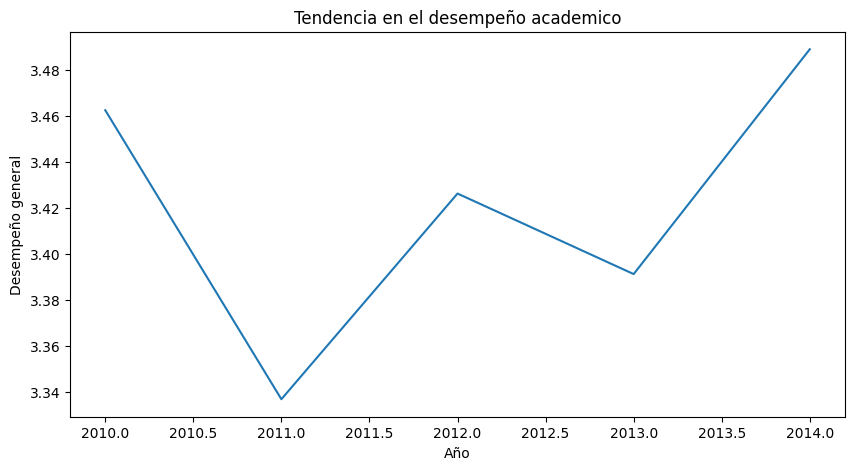

In [184]:
#tendencia en el desempeño academico
rendimiento_anual.plot(kind='line', xlabel='Año', ylabel='Desempeño general',
                       title="Tendencia en el desempeño academico",
                       figsize=(10,5))#primero eje x y luego eje y

In [185]:
# Comparativo de cohortes por diferentes años
Comparativo_cohortes_Año = df_calificaciones.groupby("YoG")[["MATEMÁTICAS", "ESPAÑOL", "INGLÉS", "QUÍMICA", "FÍSICA", "FILOSOFÍA"]].mean()
Comparativo_cohortes_Año

,MATEMÁTICAS,ESPAÑOL,INGLÉS,QUÍMICA,FÍSICA,FILOSOFÍA
YoG,,,,,,
2010,3.539617,3.617596,3.552596,3.379617,3.422149,3.262872
2011,3.380318,3.431826,3.295817,3.343397,3.492760,3.076285
2012,3.489328,3.637549,3.260042,3.467759,3.542857,3.159468
2013,3.461171,3.690444,3.295820,3.290493,3.544772,3.064192
2014,3.605276,3.739241,3.267638,3.629759,3.624328,3.067310


In [186]:
Cantidad_en_riesgo=df_calificaciones.loc[df_calificaciones['ESTADO'].isin(['EN RIESGO'])]
Cantidad_en_riesgo.groupby("Gender")["ESTADO"].count()

,ESTADO
Gender,
Female,193
Male,608


## Parte 6: Manipulación Avanzada y Exportación (30 puntos)

16. (10 puntos) Manejo de muestras:
    - Genere una muestra aleatoria del 30% de los datos
    - Compare estadísticamente la muestra con la población total
    - Valide la representatividad de la muestra

In [187]:
#Gráficos de líneas y tendencias:
# Cree un gráfico de líneas que muestre la evolución del promedio general por año de graduación
df_calificaciones_promedio=df_calificaciones[['YoG', 'PROMEDIO_GENERAL']]
df_calificaciones_promedio = df_calificaciones.groupby('YoG')['PROMEDIO_GENERAL'].mean().reset_index()
df_calificaciones_promedio.set_index('YoG', inplace=True)
df_calificaciones_promedio

,PROMEDIO_GENERAL
YoG,
2010,3.462408
2011,3.336734
2012,3.426167
2013,3.391149
2014,3.488925


<Axes: title={'center': 'Promedio General por Año'}, xlabel='Año', ylabel='Promedio General'>

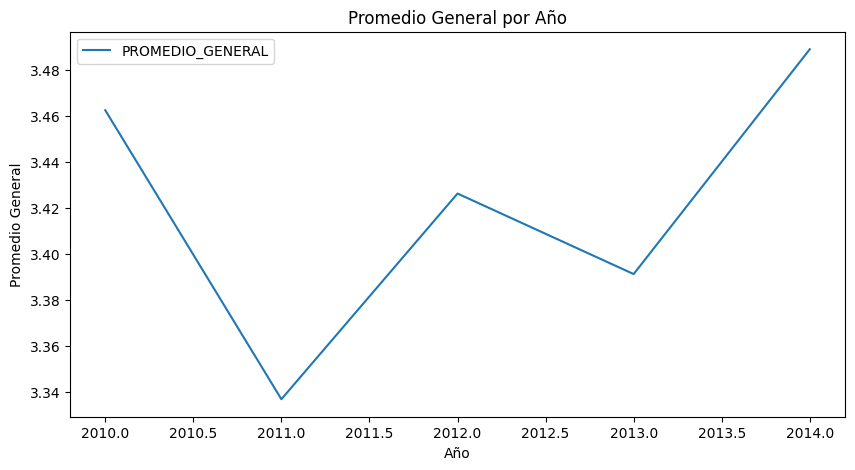

In [188]:
df_calificaciones_promedio.plot(kind='line', xlabel='Año', ylabel='Promedio General',
                        title='Promedio General por Año',
                        figsize=(10,5))#primero eje x y luego eje y

In [189]:
# Visualice la tendencia de calificaciones en MATEMÁTICAS y FÍSICA a lo largo de los años
df_calificaciones_materias=df_calificaciones[['YoG', 'MATEMÁTICAS', 'FÍSICA']]
df_calificaciones_materias = df_calificaciones_materias.groupby('YoG')[['MATEMÁTICAS', 'FÍSICA']].mean().reset_index()
df_calificaciones_materias.set_index('YoG', inplace=True)
df_calificaciones_materias

,MATEMÁTICAS,FÍSICA
YoG,,
2010,3.539617,3.422149
2011,3.380318,3.492760
2012,3.489328,3.542857
2013,3.461171,3.544772
2014,3.605276,3.624328


<Axes: title={'center': 'Calificaciones en Matemáticas y Física'}, xlabel='Año', ylabel='Tendencia'>

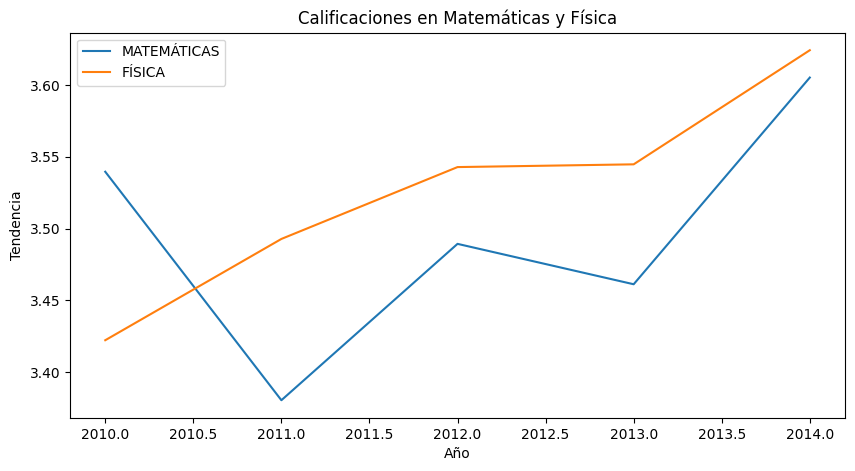

In [190]:
df_calificaciones_materias.plot(kind='line', xlabel='Año', ylabel='Tendencia',
                        title='Calificaciones en Matemáticas y Física',
                        figsize=(10,5))#primero eje x y luego eje y

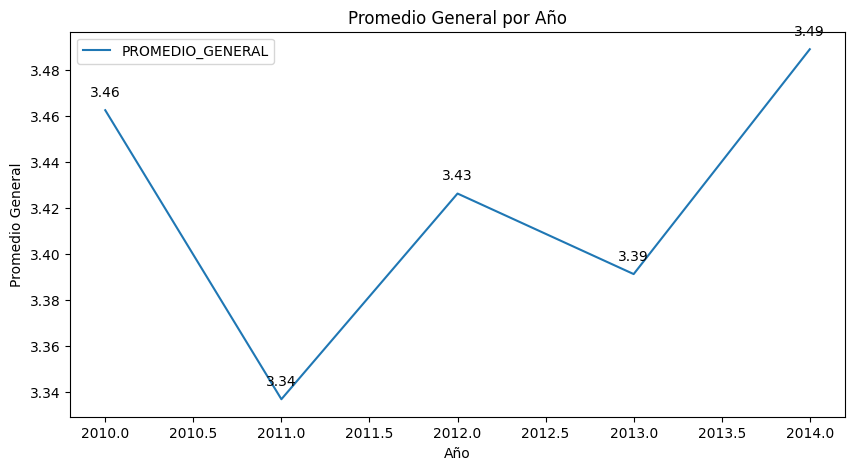

In [191]:
# Personalice los gráficos con títulos, etiquetas y leyendas apropiadas
import matplotlib.pyplot as plt
ax = df_calificaciones_promedio.plot(kind="line", xlabel='Año', ylabel="Promedio General",
                                     title='Promedio General por Año', figsize=(10, 5))

for i, row in df_calificaciones_promedio.iterrows():
    ax.annotate(f"{row['PROMEDIO_GENERAL']:.2f}",  # El valor a mostrar con 2 decimales
                xy=(row.name, row['PROMEDIO_GENERAL']),  # Coordenadas (x, y)
                textcoords="offset points",  # Desplazamiento de la etiqueta
                xytext=(0, 10),  # Desplazamiento en puntos (x, y)
                ha='center')  # Alineación horizontal de la etiqueta

plt.show()  # Agrega esta línea para mostrar el gráfico

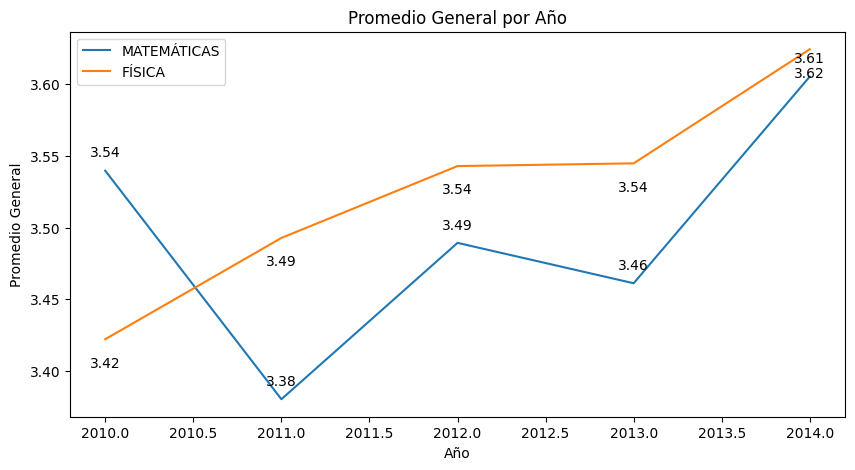

In [192]:
ax = df_calificaciones_materias.plot(kind="line", xlabel='Año', ylabel="Promedio General",
                                     title='Promedio General por Año', figsize=(10, 5))

for i, row in df_calificaciones_materias.iterrows():
    ax.annotate(f"{row['MATEMÁTICAS']:.2f}", # Valor de MATEMATICAS con 2 decimales
                xy=(row.name, row['MATEMÁTICAS']), # Coordenadas para MATEMATICAS
                textcoords="offset points", # Desplazamiento de la etiqueta
                xytext=(0, 10), # Desplazamiento en puntos (x, y)
                ha='center') # Alineación horizontal

    ax.annotate(f"{row['FÍSICA']:.2f}", # Valor de FISICA con 2 decimales
                xy=(row.name, row['FÍSICA']), # Coordenadas para FISICA
                textcoords="offset points", # Desplazamiento de la etiqueta
                xytext=(0, -20), # Desplazamiento en puntos (x, y) - ajusta el desplazamiento para FISICA
                ha='center') # Alineación horizontal

plt.show() # Agrega esta línea para mostrar el gráfico


In [193]:
#Gráficos de barras y comparativos:
#Genere un gráfico de barras comparando el promedio de todas las materias
df_calificaciones_materias_2=df_calificaciones[['YoG', 'MATEMÁTICAS', 'ESPAÑOL', 'INGLÉS', 'QUÍMICA', 'FÍSICA', 'FILOSOFÍA']]
df_calificaciones_materias_2 = df_calificaciones_materias_2.groupby('YoG')[['MATEMÁTICAS', 'ESPAÑOL', 'INGLÉS', 'QUÍMICA', 'FÍSICA', 'FILOSOFÍA']].mean().reset_index()
df_calificaciones_materias_2.set_index('YoG', inplace=True)
df_calificaciones_materias_2

,MATEMÁTICAS,ESPAÑOL,INGLÉS,QUÍMICA,FÍSICA,FILOSOFÍA
YoG,,,,,,
2010,3.539617,3.617596,3.552596,3.379617,3.422149,3.262872
2011,3.380318,3.431826,3.295817,3.343397,3.492760,3.076285
2012,3.489328,3.637549,3.260042,3.467759,3.542857,3.159468
2013,3.461171,3.690444,3.295820,3.290493,3.544772,3.064192
2014,3.605276,3.739241,3.267638,3.629759,3.624328,3.067310


<Axes: title={'center': 'Promedio por materias'}, xlabel='Año', ylabel='Materias'>

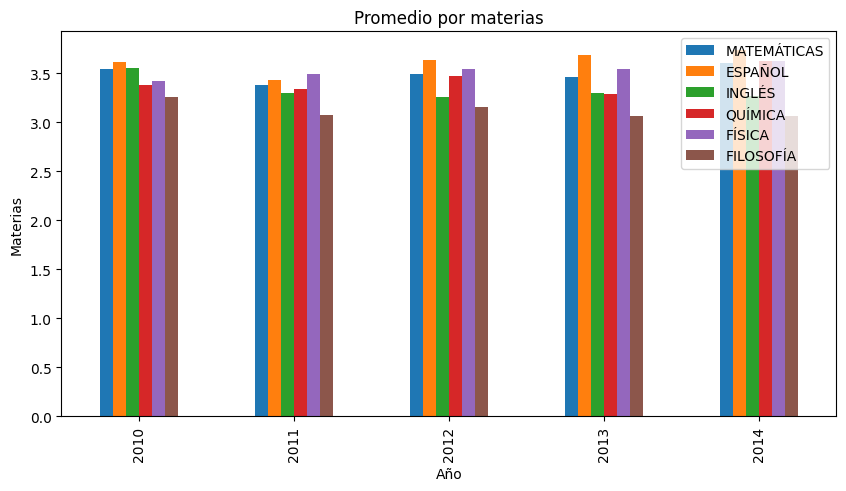

In [194]:
df_calificaciones_materias_2.plot(kind='bar', xlabel='Año', ylabel='Materias',
                        title='Promedio por materias',
                        figsize=(10,5))#primero eje x y luego eje y

In [206]:
#Cree un gráfico de barras agrupadas mostrando el desempeño por género en cada materia
df_calificaciones_materias_3=df_calificaciones[['Gender', 'MATEMÁTICAS', 'ESPAÑOL', 'INGLÉS', 'QUÍMICA', 'FÍSICA', 'FILOSOFÍA']]
df_calificaciones_materias_3 = df_calificaciones_materias_3.groupby('Gender')[['MATEMÁTICAS', 'ESPAÑOL', 'INGLÉS', 'QUÍMICA', 'FÍSICA', 'FILOSOFÍA']].mean().reset_index()
df_calificaciones_materias_3.set_index('Gender', inplace=True)
df_calificaciones_materias_3


,MATEMÁTICAS,ESPAÑOL,INGLÉS,QUÍMICA,FÍSICA,FILOSOFÍA
Gender,,,,,,
Female,3.680412,3.621345,3.528390,3.702553,3.794556,3.139222
Male,3.390942,3.644368,3.206006,3.259652,3.385853,3.108689


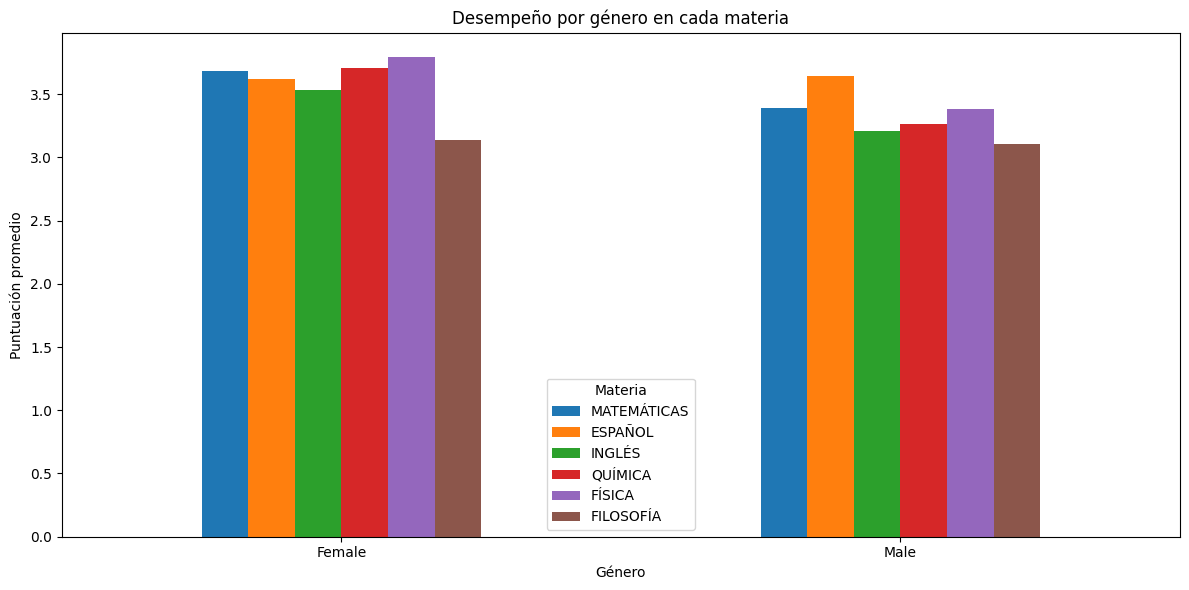

In [207]:
df_calificaciones_materias_3.plot(kind='bar', figsize=(12, 6))

# Personalizar el gráfico
plt.title('Desempeño por género en cada materia')
plt.xlabel('Género')
plt.ylabel('Puntuación promedio')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.legend(title='Materia')
plt.tight_layout() #Ajusta el diseño para evitar que los elementos se superpongan

# Mostrar el gráfico
plt.show()

<Axes: >

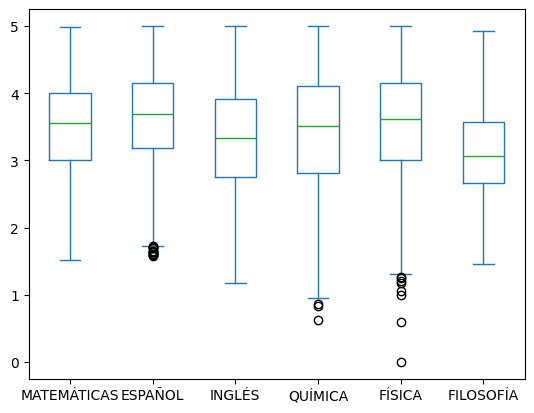

In [208]:
#Visualizaciones estadísticas:
#Cree un diagrama de caja (boxplot) para cada materia
df_calificaciones[['MATEMÁTICAS', 'ESPAÑOL', 'INGLÉS', 'QUÍMICA', 'FÍSICA', 'FILOSOFÍA']].plot(kind='box')

In [209]:
df_calificaciones_materias_5=df_calificaciones['ESTADO'].value_counts()
df_calificaciones_materias_5


,count
ESTADO,
BUENO,1321
REGULAR,825
EN RIESGO,801
EXCELENTE,99


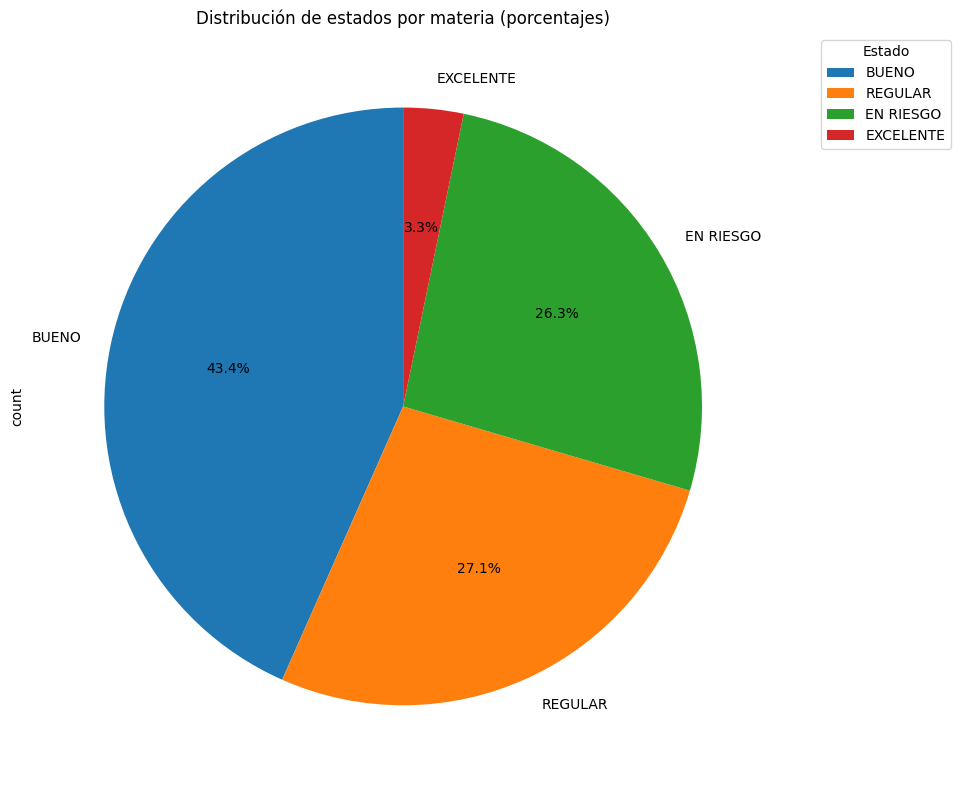

In [210]:
#Genere un gráfico circular (pie chart) mostrando la distribución de estudiantes por estado
df_calificaciones_materias_5.plot(kind='pie', subplots=True, figsize=(15, 8), autopct='%1.1f%%', startangle=90)
# Personalizar el gráfico
plt.title('Distribución de estados por materia (porcentajes)')
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')  # Colocar la leyenda fuera del gráfico
plt.tight_layout()
plt.show()


<ipython-input-199-573863ada223>:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout() #Ajusta el diseño para evitar que los elementos se superpongan
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


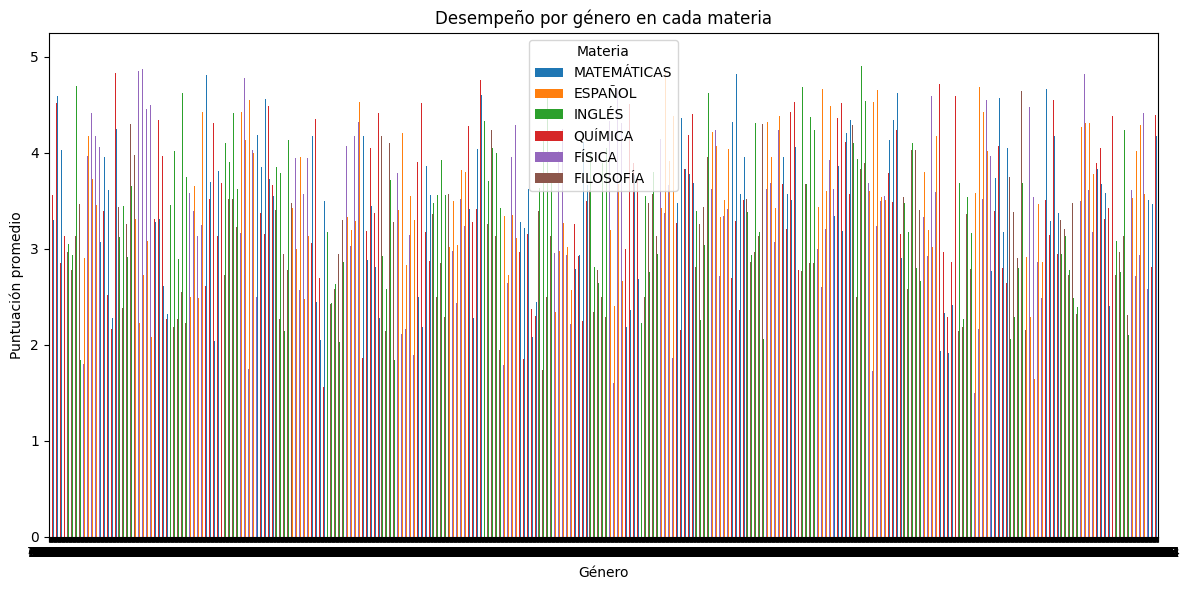

In [199]:
df_calificaciones_materias_3.plot(kind='bar', figsize=(12, 6))

# Personalizar el gráfico
plt.title('Desempeño por género en cada materia')
plt.xlabel('Género')
plt.ylabel('Puntuación promedio')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.legend(title='Materia')
plt.tight_layout() #Ajusta el diseño para evitar que los elementos se superpongan

# Mostrar el gráfico
plt.show()

**Parte 6: Manipulación Avanzada y Exportación**


In [202]:
df_poblacion=pd.read_csv('/content/drive/MyDrive/Alexander Niño.lnk/2025/_Python/population_total.csv')
df_poblacion.dropna()

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


In [203]:
# Manejo de muestras:
# Genere una muestra aleatoria del 30% de los datos
muestra_aletoria= df_poblacion.sample(frac=0.3)
muestra_aletoria

,country,year,population
1038,Guam,1995.0,145561.0
88,Myanmar,1985.0,37977086.0
2540,Denmark,1970.0,4931241.0
1543,Cabo Verde,1970.0,268627.0
1378,Réunion,2020.0,895312.0
...,...,...,...
2258,Croatia,1975.0,4500867.0
641,Turks and Caicos,1970.0,5841.0
3581,Angola,2016.0,28842489.0
2369,Finland,2000.0,5187954.0


In [204]:
# Compare estadísticamente la muestra con la población total
muestra_aletoria.describe()

,year,population
count,1255.000000,1.255000e+03
mean,1993.313147,2.584355e+07
std,21.227107,1.156571e+08
min,1955.000000,7.240000e+02
25%,1975.000000,2.498545e+05
50%,1995.000000,3.501839e+06
75%,2016.000000,1.306047e+07
max,2020.000000,1.439324e+09
